In [ ]:
!pip install japanize_matplotlib

In [17]:
from matplotlib import pyplot as plt
import japanize_matplotlib
import scipy.stats as stats
import numpy as np
import pandas as pd
import statsmodels.api as sm
import pymc as pm
import arviz as az
from scipy.stats import beta
from scipy.stats import gamma
from scipy.stats import invgamma, t

In [2]:
np.random.seed(42)

# ベルヌーイ分布の推定

In [3]:
x = np.random.binomial(1, 0.05, 100)

# x における1の数
n_1 = np.sum(x)
# x における0の数
n_0 = len(x) - n_1

print(f'0の数: {n_0}, 1の数: {n_1}')

0の数: 95, 1の数: 5


In [4]:
# x における1の割合
p = n_1 / len(x)
print(f'1の割合: {p}')

1の割合: 0.05


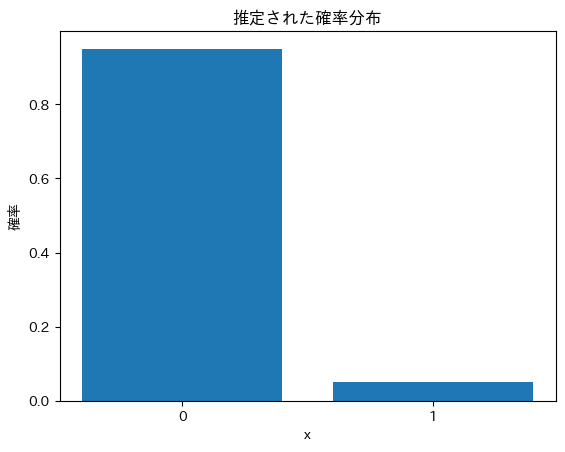

In [5]:
plt.bar([0, 1], [1-p, p])
plt.xticks([0, 1], ['0', '1'])
plt.xlabel('x')
plt.ylabel('確率')
plt.title('推定された確率分布')
plt.show();

# ポアソン分布の推定

In [6]:
x = np.random.poisson(4, 100)
print("データの確認:")
print(x)

# ポアソン分布のパラメータλを最尤推定で推定
λ = np.mean(x)
print(f'λ: {λ}')

データの確認:
[ 2  5  2 10  2  2  3  5  5  2  1  3  6  4  2  2  3  4  4  4  9  1  2  2
  4  6  3  7  4  6  8  5  7  7  7  2  3  2  3  2  7  2  3  2  4  6  1  1
  3  3  4  5  2  8  3  1  2  2  4  6  7  6  2  5  5  4  4  3  2  3  8  5
  0  2  5  4  5  9  6  3  7  8  1  8  2 10  6  8  1  4  0  5  6  6  2  1
  2  4  2  2]
λ: 4.03


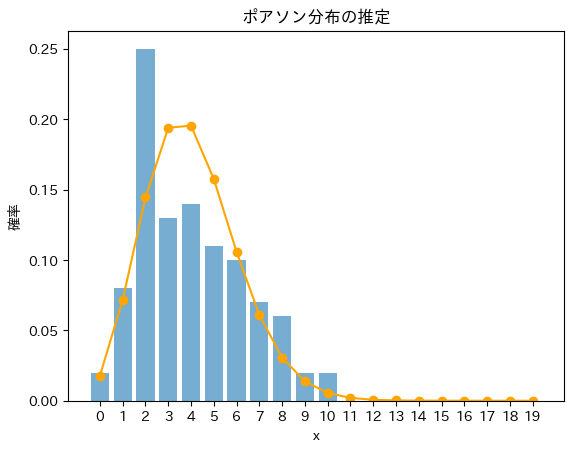

In [7]:
# 観測値の相対度数の棒グラフと推定された確率質量関数を描画
hist, _ = np.histogram(x, bins=20, range=(0, 20))
hist = hist / len(x)
plt.bar(range(20), hist, alpha=0.6)
y = stats.poisson.pmf(range(20), λ)
plt.plot(range(20), y, marker='o', color='orange')
plt.xlabel('x')
plt.ylabel('確率')
plt.title('ポアソン分布の推定')
plt.xticks(range(20))
plt.show();

# 正規分布の推定

In [8]:
x = np.random.normal(5, 0.05, 500)
print("データの確認:")
print(x)

# パラメータの最尤推定
mu = np.mean(x)
sigma2 = np.var(x)
print(f'平均: {mu}, 分散: {sigma2}')

データの確認:
[4.92829556 4.99042336 5.0028737  4.88585988 4.99490252 5.0021067
 5.02572945 5.06023175 5.04256771 4.96898181 4.96317939 5.02897522
 4.97263601 4.9385973  5.11870709 4.98446379 4.96867379 4.8903935
 5.0425701  4.95060321 5.00143103 5.04843116 4.95138657 5.00397412
 5.07618937 4.87716265 4.95947471 4.95477291 4.99065474 4.99761046
 4.94693687 4.96728133 4.96133875 4.98246054 5.01091114 5.04552821
 5.05276655 5.03268171 4.95630129 4.9998352  5.11871647 5.05072663
 4.97797477 5.07910191 4.98059654 4.9665799  5.0697866  4.93451754
 4.90431112 5.04706423 5.00138455 5.00636827 4.98192886 4.98807533
 4.9770945  4.96870035 4.98090449 4.97932744 4.95857081 4.97274154
 4.87486202 5.03423211 5.01951266 4.99575456 5.01186622 5.01367887
 4.96379991 4.97337098 5.02641583 5.01037517 5.10216602 5.08098061
 5.04665061 4.96191325 4.97177215 4.94989766 5.01398787 4.86295226
 4.97706904 4.98466418 4.92378547 5.03988682 4.94304291 5.01338713
 5.13918887 4.91944972 4.99257243 4.97962699 4.96990157 

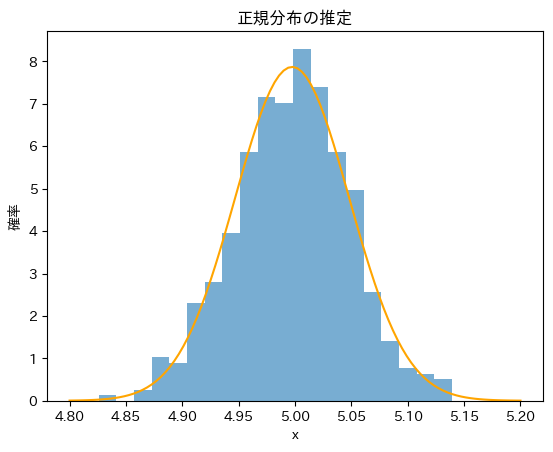

In [9]:
# 観測値の相対度数のヒストグラムと推定された確率密度関数を描画
plt.hist(x, bins=20, density=True, alpha=0.6)
temp = np.linspace(4.8, 5.2, 100)
y = stats.norm.pdf(temp, mu, np.sqrt(sigma2))
plt.plot(temp, y, color='orange')
plt.xlabel('x')
plt.ylabel('確率')
plt.title('正規分布の推定')
plt.show();

# 指数分布の推定

In [10]:
x = np.random.exponential(0.2, 300)
print("データの確認:")
print(x)

# λの最尤推定
λ = 1 / np.mean(x)
print(f'λ: {λ}')

データの確認:
[1.31371672e-01 2.49558328e-02 2.67487498e-02 2.31395763e-01
 1.12531144e-01 4.47599350e-02 1.35295203e-01 1.32726102e-02
 1.74441086e-01 6.26665593e-02 3.19461458e-01 7.43176794e-02
 1.21474702e-01 2.33771721e-03 1.50410445e-02 9.96784994e-02
 1.30761770e-01 1.83268421e-01 6.89669430e-02 2.37476823e-01
 3.93397501e-01 3.02690128e-01 8.08500328e-03 1.30980368e-01
 2.21707102e-02 5.54262566e-02 8.63436531e-01 3.07457804e-02
 1.38185191e-01 1.92548487e-01 2.42444663e-01 1.64036485e-01
 1.96377908e-03 7.90419672e-02 1.45842619e-01 1.83937834e-02
 8.63495782e-02 6.75336914e-03 1.63675379e-02 1.01142171e-01
 2.84777012e-02 1.67653481e-01 2.33891713e-01 3.22475144e-01
 4.46662749e-02 3.66602270e-02 2.20897635e-02 2.02356823e-01
 2.45158988e-01 6.41914935e-03 5.50438811e-01 1.06740971e-02
 1.55870178e-01 2.46928001e-01 4.09540710e-01 2.50413495e-01
 3.23623175e-01 8.29365498e-02 3.37290914e-01 1.67012900e-02
 4.50410064e-01 1.58634337e-01 3.39979522e-01 1.20412194e-01
 2.06327800e-01 

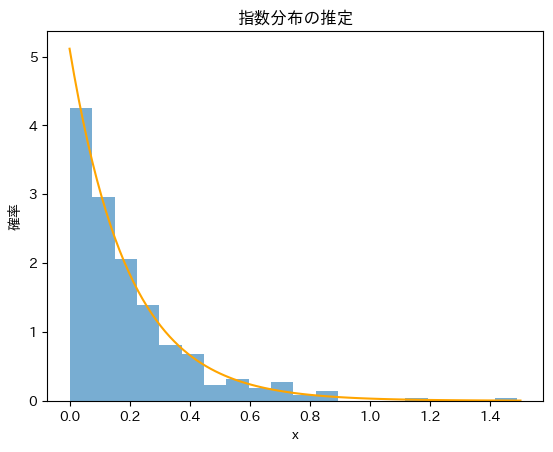

In [11]:
# 観測値の相対度数のヒストグラムと推定された確率密度関数を描画
plt.hist(x, bins=20, density=True, alpha=0.6)
temp = np.linspace(0, 1.5, 100)
y = stats.expon.pdf(temp, scale=1/λ)
plt.plot(temp, y, color='orange')
plt.xlabel('x')
plt.ylabel('確率')
plt.title('指数分布の推定')
plt.show();

# ベルヌーイ分布のベイズ推論

0の数: 95, 1の数: 5
1の割合（標本比率）: 0.05


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.


    mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
p  0.059  0.023   0.019    0.102        0.0      0.0    3879.0    4356.0   

   r_hat  
p    1.0  


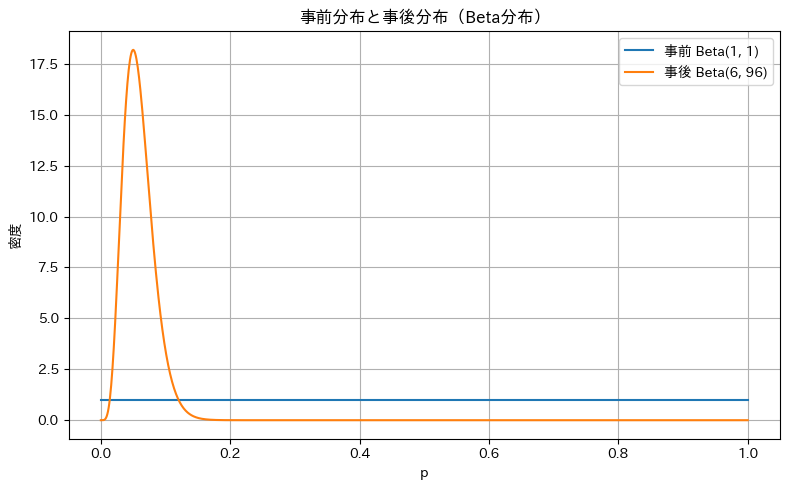

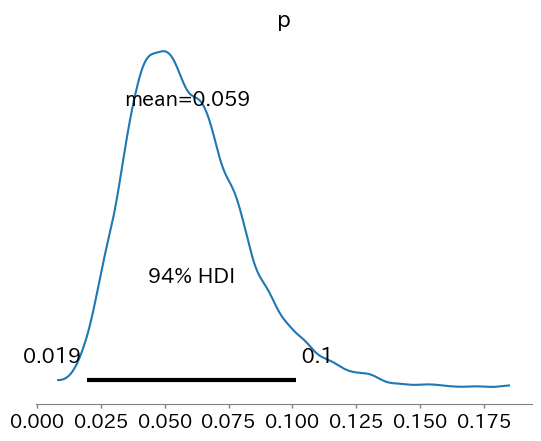

In [14]:
# データ生成

x = np.random.binomial(1, 0.05, 100)

# x における1の数
n_1 = np.sum(x)
# x における0の数
n_0 = len(x) - n_1

print(f'0の数: {n_0}, 1の数: {n_1}')

# x における1の割合
p_hat = n_1 / len(x)
print(f'1の割合（標本比率）: {p_hat}')

# -----------------------
# ベイズ推論 (PyMC)
# -----------------------

# 事前分布のパラメータ（ここを変えれば事前を変更可能）
alpha_prior = 1.0
beta_prior  = 1.0

with pm.Model() as model:
    # 事前分布 p ~ Beta(alpha_prior, beta_prior)
    p = pm.Beta("p", alpha=alpha_prior, beta=beta_prior)

    # 尤度 x_i ~ Bernoulli(p)
    y = pm.Bernoulli("y", p=p, observed=x)

    # サンプリング
    trace = pm.sample(2000, tune=1000, chains=4, random_seed=42, return_inferencedata=True)

print(az.summary(trace, var_names=["p"]))

# -----------------------
# 事前分布と事後分布の理論分布を描画
# （ベータ分布の共役事後）
# -----------------------
# 共役なので事後も Beta になる：
# p | x ~ Beta(alpha_prior + n_1, beta_prior + n_0)
alpha_post = alpha_prior + n_1
beta_post  = beta_prior + n_0

# プロット用の x 軸
grid = np.linspace(0, 1, 1000)

prior_pdf = beta.pdf(grid, alpha_prior, beta_prior)
post_pdf  = beta.pdf(grid, alpha_post, beta_post)

plt.figure(figsize=(8, 5))
plt.plot(grid, prior_pdf, label=f"事前 Beta({alpha_prior:.0f}, {beta_prior:.0f})")
plt.plot(grid, post_pdf,  label=f"事後 Beta({alpha_post:.0f}, {beta_post:.0f})")
plt.xlabel("p")
plt.ylabel("密度")
plt.title("事前分布と事後分布（Beta分布）")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# -----------------------
# PyMC サンプルからの事後分布プロット
# -----------------------
az.plot_posterior(trace, var_names=["p"])
plt.show()

# ポアソン分布のベイズ推論

Initializing NUTS using jitter+adapt_diag...


データの確認:
[3 5 7 7 3 7 4 2 5 3 3 3 4 1 3 7 3 5 2 3 1 5 4 3 7 4 7 5 2 1 6 2 3 3 3 4 9
 4 4 7 7 4 3 6 6 0 3 5 4 3 3 7 3 3 3 6 3 6 2 7 4 4 1 5 6 1 5 5 1 3 4 1 2 4
 4 5 5 1 4 3 3 6 3 3 2 6 4 3 4 5 6 7 4 4 6 3 4 6 6 3]
λ (最尤推定): 4.04


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lam]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.


      mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
lam  4.011  0.196   3.654    4.386      0.003    0.002    3335.0    5886.0   

     r_hat  
lam    1.0  
事前: Gamma(alpha=1.0, beta=1.0)
事後: Gamma(alpha=405.0, beta=101.0)


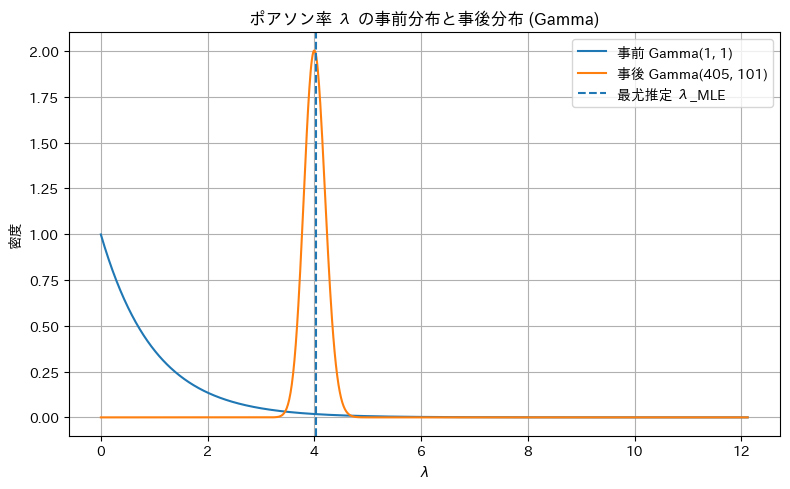

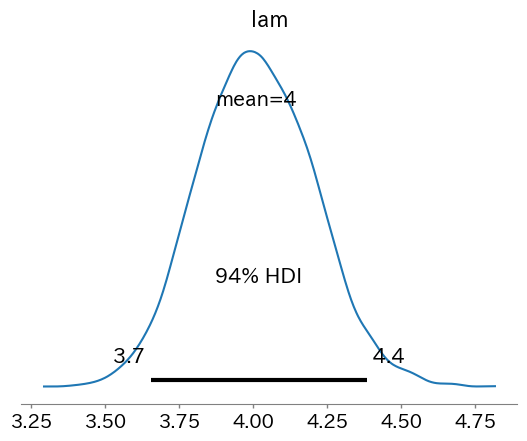

In [16]:
# -----------------------
# データ生成
# -----------------------
x = np.random.poisson(4, 100)
print("データの確認:")
print(x)

# ポアソン分布のパラメータ λ を最尤推定（標本平均）
lambda_mle = np.mean(x)
print(f'λ (最尤推定): {lambda_mle}')

# -----------------------
# 事前分布のパラメータ設定
# -----------------------
# Gamma(alpha, beta) : shape = alpha, rate = beta
alpha_prior = 1.0
beta_prior  = 1.0

# -----------------------
# PyMC でベイズ推論
# -----------------------
with pm.Model() as model:
    # 事前分布 λ ~ Gamma(alpha_prior, beta_prior)
    lam = pm.Gamma("lam", alpha=alpha_prior, beta=beta_prior)

    # 尤度 x_i ~ Poisson(λ)
    y = pm.Poisson("y", mu=lam, observed=x)

    # サンプリング
    trace = pm.sample(
        2000,      # 有効サンプル数
        tune=1000, # バーンイン
        chains=4,
        random_seed=42,
        return_inferencedata=True
    )

# 結果の要約
print(az.summary(trace, var_names=["lam"]))

# -----------------------
# 共役事後分布 (Gamma) の理論値を計算
# -----------------------
# λ ~ Gamma(alpha_prior, beta_prior),
# x_i ~ Poisson(λ) のとき、
# 事後 λ | x ~ Gamma(alpha_prior + Σx, beta_prior + N)
N = len(x)
sum_x = np.sum(x)

alpha_post = alpha_prior + sum_x
beta_post  = beta_prior + N

print(f"事前: Gamma(alpha={alpha_prior}, beta={beta_prior})")
print(f"事後: Gamma(alpha={alpha_post}, beta={beta_post})")

# -----------------------
# 事前分布と事後分布の描画
# -----------------------
# SciPy の gamma.pdf は scale=1/rate なので注意
grid_max = max(10, lambda_mle * 3)  # x軸の最大値を適当に設定
grid = np.linspace(0.001, grid_max, 1000)

prior_pdf = gamma.pdf(grid, a=alpha_prior, scale=1/beta_prior)
post_pdf  = gamma.pdf(grid, a=alpha_post, scale=1/beta_post)

plt.figure(figsize=(8, 5))
plt.plot(grid, prior_pdf, label=f"事前 Gamma({alpha_prior:.0f}, {beta_prior:.0f})")
plt.plot(grid, post_pdf,  label=f"事後 Gamma({alpha_post:.0f}, {beta_post:.0f})")
plt.axvline(lambda_mle, linestyle="--", label="最尤推定 λ_MLE")
plt.xlabel(r"$\lambda$")
plt.ylabel("密度")
plt.title("ポアソン率 λ の事前分布と事後分布 (Gamma)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# -----------------------
# PyMC サンプルからの事後分布プロット
# -----------------------
az.plot_posterior(trace, var_names=["lam"])
plt.show()


# 正規分布のベイズ推論

Initializing NUTS using jitter+adapt_diag...


データの確認:
[4.97173576 4.97946457 4.96686431 4.89851631 5.03817956 5.062853
 4.92407755 5.06219265 4.99484884 5.06125662 5.00189752 5.00677723
 5.01862173 4.96049668 5.05973371 4.94393097 4.97989666 5.02621323
 4.97454024 5.03887656 5.06879331 5.0506273  4.90319423 5.00629235
 5.05143413 4.93416256 5.03618053 5.03337304 4.93939551 5.04171163
 5.01363489 5.03251909 4.95168438 5.00750681 4.91475607 4.88615044
 5.00704142 5.05502988 5.01264684 4.9968277  4.99062329 4.95287173
 4.98890695 5.02108422 4.97823889 5.03752934 5.00979875 5.01584897
 5.04443314 4.97366223 5.03296903 4.98067616 5.01697572 4.96771143
 4.95446481 5.00459324 4.90574    4.98518663 4.91968115 5.0389617
 5.05250553 4.95680244 5.02141565 5.04495679 5.04512346 5.01072254
 5.03671523 4.96753343 5.00415612 4.97664483 4.9633106  5.00180317
 5.01737652 5.05817544 5.01325778 5.03209653 5.03266416 5.13437672
 4.90949838 4.96560331 5.0737028  4.98239935 5.04429016 5.01150048
 5.10526012 4.94434728 5.06109003 5.08747907 4.94927906 5

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma2, mu]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.


         mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
mu      4.998  0.004   4.991    5.005        0.0      0.0    7582.0    5686.0   
sigma2  0.007  0.000   0.006    0.008        0.0      0.0    7922.0    5746.0   

        r_hat  
mu        1.0  
sigma2    1.0  
事前ハイパーパラメータ: mu0=0.0, kappa0=0.01, alpha0=2.0, beta0=1.0
事後ハイパーパラメータ: mu_n=4.997868336477671, kappa_n=500.01, alpha_n=252.0, beta_n=1.7512859738184994


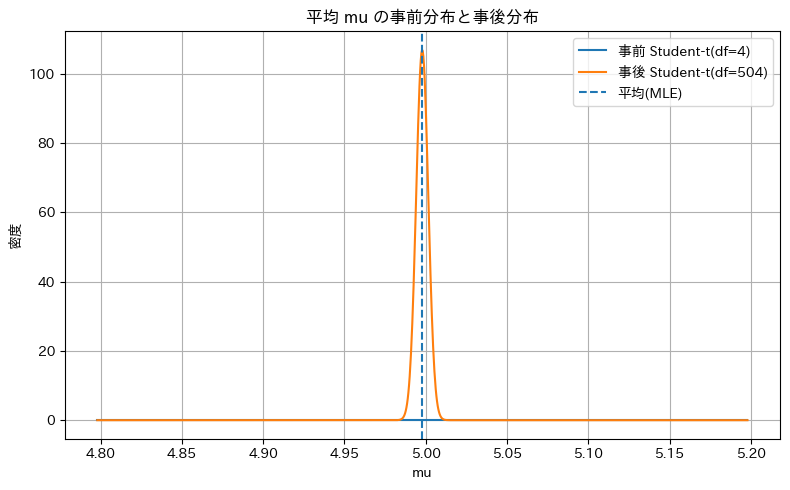

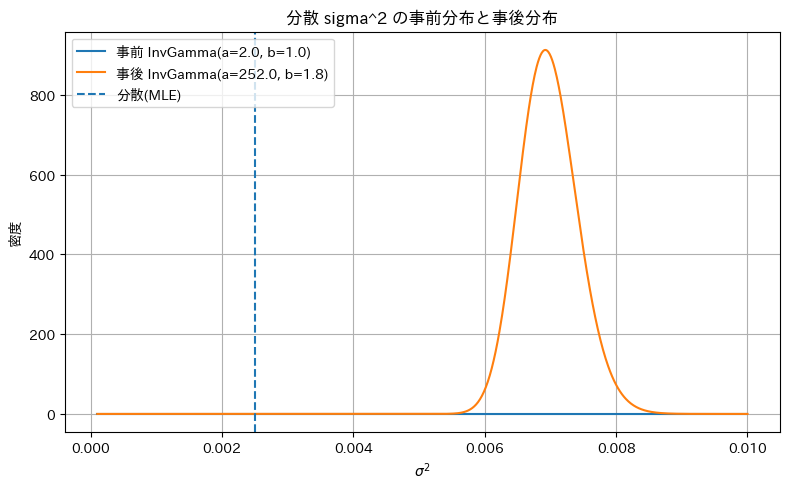

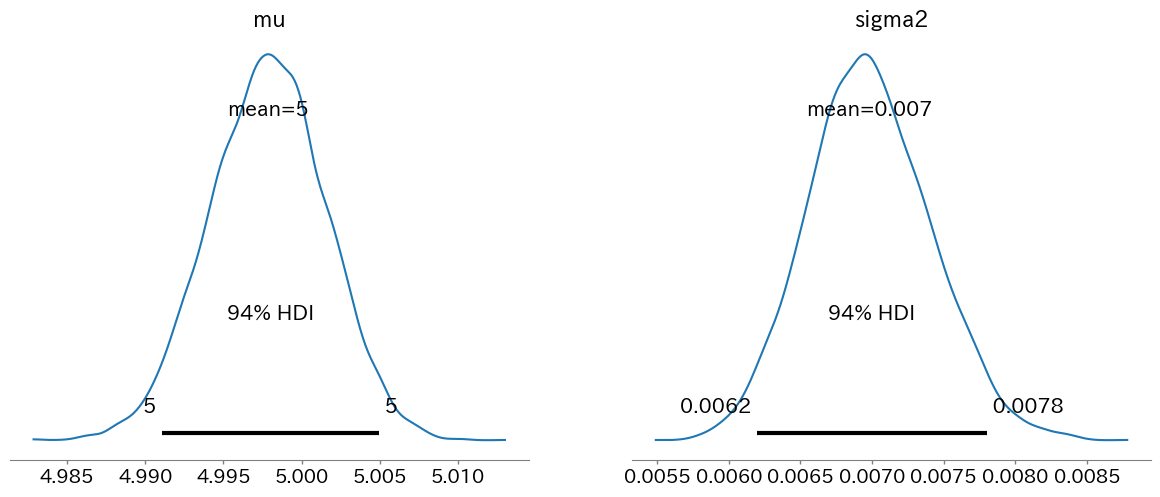

In [18]:
# -----------------------
# データ生成
# -----------------------
x = np.random.normal(5, 0.05, 500)
print("データの確認:")
print(x)

# パラメータの最尤推定
mu_mle = np.mean(x)
sigma2_mle = np.var(x)
print(f'平均(MLE): {mu_mle}, 分散(MLE): {sigma2_mle}')

# -----------------------
# 正規分布の平均・分散のベイズ推論
#   x_i ~ Normal(mu, sigma^2)
#   事前: (mu, sigma^2) に Normal-Inverse-Gamma を置く
#   sigma^2 ~ InvGamma(alpha0, beta0)
#   mu | sigma^2 ~ Normal(mu0, sigma^2 / kappa0)
# -----------------------

# 事前ハイパーパラメータ（広い事前分布に設定）
mu0    = 0.0     # mu の事前平均
kappa0 = 0.01    # mu の事前精度（小さいほど広い事前分布）
alpha0 = 2.0     # sigma^2 の事前形状
beta0  = 1.0     # sigma^2 の事前スケール

# -----------------------
# PyMC モデル定義
# -----------------------
with pm.Model() as model:
    # sigma^2 ~ InvGamma(alpha0, beta0)
    sigma2 = pm.InverseGamma("sigma2", alpha=alpha0, beta=beta0)
    
    # mu | sigma^2 ~ Normal(mu0, sigma^2 / kappa0)
    mu = pm.Normal("mu", mu=mu0, sigma=pm.math.sqrt(sigma2 / kappa0))
    
    # 観測 x_i ~ Normal(mu, sigma^2)
    y = pm.Normal("y", mu=mu, sigma=pm.math.sqrt(sigma2), observed=x)
    
    # サンプリング
    trace = pm.sample(
        2000,
        tune=1000,
        chains=4,
        random_seed=42,
        return_inferencedata=True
    )

# 結果要約
print(az.summary(trace, var_names=["mu", "sigma2"]))

# -----------------------
# 共役事後分布のパラメータ計算
# -----------------------
n = len(x)
x_bar = np.mean(x)
S = np.sum((x - x_bar) ** 2)   # 偏差平方和

# Normal-Inverse-Gamma の事後ハイパーパラメータ
kappa_n = kappa0 + n
mu_n    = (kappa0 * mu0 + n * x_bar) / kappa_n
alpha_n = alpha0 + n / 2
beta_n  = beta0 + 0.5 * (S + (kappa0 * n / kappa_n) * (x_bar - mu0) ** 2)

print(f"事前ハイパーパラメータ: mu0={mu0}, kappa0={kappa0}, alpha0={alpha0}, beta0={beta0}")
print(f"事後ハイパーパラメータ: mu_n={mu_n}, kappa_n={kappa_n}, alpha_n={alpha_n}, beta_n={beta_n}")

# -----------------------
# 事前・事後の「周辺」分布を描画
#   mu の周辺分布: Student-t
#   sigma^2 の周辺分布: Inverse-Gamma
# -----------------------

# ---- mu の事前 / 事後（Student-t 分布）----
# mu の周辺分布（理論）:
#  事前:    mu ~ t_{2*alpha0}(loc=mu0, scale=s0)
#  事後:    mu | x ~ t_{2*alpha_n}(loc=mu_n, scale=s_n)
#  ここで scale^2 = beta / (kappa * alpha)

df_prior = 2 * alpha0
df_post  = 2 * alpha_n

scale_prior = np.sqrt(beta0 / (kappa0 * alpha0))
scale_post  = np.sqrt(beta_n / (kappa_n * alpha_n))

mu_grid = np.linspace(mu_mle - 0.2, mu_mle + 0.2, 1000)  # データの平均付近を描画範囲に

prior_mu_pdf = t.pdf(mu_grid, df=df_prior, loc=mu0, scale=scale_prior)
post_mu_pdf  = t.pdf(mu_grid, df=df_post,  loc=mu_n, scale=scale_post)

plt.figure(figsize=(8, 5))
plt.plot(mu_grid, prior_mu_pdf, label=f"事前 Student-t(df={df_prior:.0f})")
plt.plot(mu_grid, post_mu_pdf,  label=f"事後 Student-t(df={df_post:.0f})")
plt.axvline(mu_mle, linestyle="--", label="平均(MLE)")
plt.xlabel("mu")
plt.ylabel("密度")
plt.title("平均 mu の事前分布と事後分布")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ---- sigma^2 の事前 / 事後（Inverse-Gamma）----
sigma2_grid = np.linspace(0.0001, max(0.01, sigma2_mle * 3), 1000)

prior_sig_pdf = invgamma.pdf(sigma2_grid, a=alpha0, scale=beta0)
post_sig_pdf  = invgamma.pdf(sigma2_grid, a=alpha_n, scale=beta_n)

plt.figure(figsize=(8, 5))
plt.plot(sigma2_grid, prior_sig_pdf, label=f"事前 InvGamma(a={alpha0:.1f}, b={beta0:.1f})")
plt.plot(sigma2_grid, post_sig_pdf,  label=f"事後 InvGamma(a={alpha_n:.1f}, b={beta_n:.1f})")
plt.axvline(sigma2_mle, linestyle="--", label="分散(MLE)")
plt.xlabel(r"$\sigma^2$")
plt.ylabel("密度")
plt.title("分散 sigma^2 の事前分布と事後分布")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# -----------------------
# PyMC サンプルからの事後分布プロット
# -----------------------
az.plot_posterior(trace, var_names=["mu", "sigma2"])
plt.show()


# 指数分布のベイズ推論

Initializing NUTS using jitter+adapt_diag...


データの確認:
[4.76973448e-01 5.75417807e-01 6.44454339e-01 1.47402944e-01
 7.57147757e-01 2.83194245e-01 3.52690349e-02 1.29596566e-01
 2.53404656e-01 5.68284200e-02 2.04672310e-01 2.19682749e-01
 3.55145088e-02 1.66521078e-01 2.95354926e-01 1.38188189e-01
 2.43539118e-03 1.81591277e-03 8.83312384e-02 5.21263235e-01
 5.19295542e-02 2.01223225e-01 5.02252559e-02 7.76242737e-02
 3.76830340e-01 2.61025061e-01 2.00523246e-02 1.11968870e-01
 5.92073196e-03 1.31127951e-01 2.17198853e-01 2.52266507e-02
 6.81842065e-02 1.01445297e-01 5.03976714e-01 9.99791215e-01
 9.19021244e-03 2.86264976e-01 9.29551649e-02 9.96668554e-02
 2.80700290e-01 5.01249999e-01 6.02895757e-01 1.72134589e-01
 8.83598001e-02 3.09808862e-01 5.78036285e-02 1.66056568e-01
 8.88136824e-02 2.13789965e-01 5.49923738e-02 4.25379135e-02
 5.00791196e-01 2.14733237e-02 1.41026912e-01 4.99110538e-02
 7.94159874e-03 7.33670112e-03 3.85281487e-02 4.03136196e-01
 6.63905413e-02 6.00991623e-01 1.74274130e-01 1.14758122e-01
 1.73542420e-01 

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lam]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 1 seconds.


      mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
lam  4.857  0.28    4.34    5.379      0.005    0.003    3204.0    5781.0   

     r_hat  
lam    1.0  
事前: Gamma(alpha=1.0, beta=1.0)
事後: Gamma(alpha=301.0, beta=61.90604757445752)


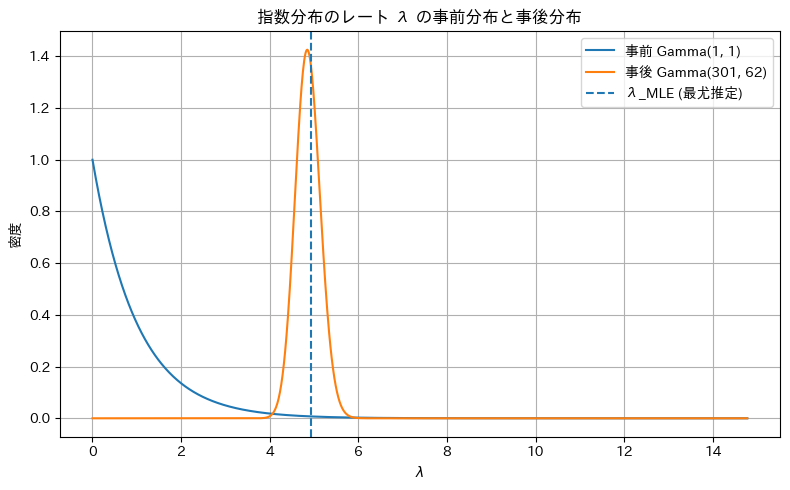

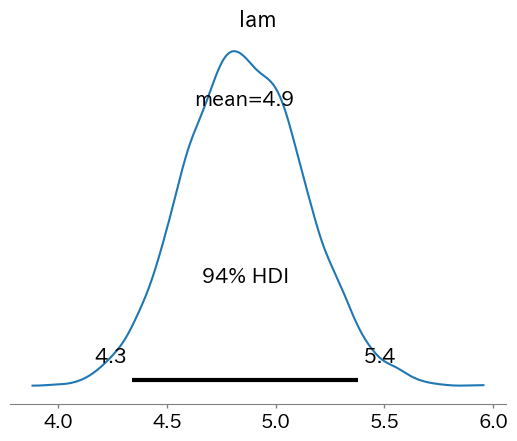

In [19]:
# -----------------------
# データ生成
# -----------------------
x = np.random.exponential(0.2, 300)
print("データの確認:")
print(x)

# λの最尤推定 (Exp(λ) のとき λ_MLE = 1 / 平均)
lambda_mle = 1 / np.mean(x)
print(f'λ (最尤推定): {lambda_mle}')

# -----------------------
# モデル設定
#   x_i ~ Exponential(λ)
#   事前: λ ~ Gamma(α, β)  (shape=α, rate=β)
#   → 共役なので 事後も Gamma になる
# -----------------------

# 事前分布のパラメータ（弱情報的なガンマ分布）
alpha_prior = 1.0   # shape
beta_prior  = 1.0   # rate

# -----------------------
# PyMC でベイズ推論
# -----------------------
with pm.Model() as model:
    # λ ~ Gamma(α, β)
    lam = pm.Gamma("lam", alpha=alpha_prior, beta=beta_prior)

    # x_i ~ Exponential(λ)
    # PyMC の Exponential は lam がレート (λ)
    y = pm.Exponential("y", lam=lam, observed=x)

    # サンプリング
    trace = pm.sample(
        2000,
        tune=1000,
        chains=4,
        random_seed=42,
        return_inferencedata=True,
    )

# 結果の要約
print(az.summary(trace, var_names=["lam"]))

# -----------------------
# 共役事後分布 (Gamma) の理論値を計算
# -----------------------
# Exponential(λ), prior λ ~ Gamma(α, β) のとき
# 事後: λ | x ~ Gamma(α + n, β + Σx)
n = len(x)
sum_x = np.sum(x)

alpha_post = alpha_prior + n
beta_post  = beta_prior + sum_x

print(f"事前: Gamma(alpha={alpha_prior}, beta={beta_prior})")
print(f"事後: Gamma(alpha={alpha_post}, beta={beta_post})")

# -----------------------
# 事前分布と事後分布の描画（λ の分布）
# -----------------------
# SciPy の gamma.pdf は scale=1/rate なので注意
grid_max = max(10, lambda_mle * 3)
grid = np.linspace(1e-4, grid_max, 1000)

prior_pdf = gamma.pdf(grid, a=alpha_prior, scale=1 / beta_prior)
post_pdf  = gamma.pdf(grid, a=alpha_post,  scale=1 / beta_post)

plt.figure(figsize=(8, 5))
plt.plot(grid, prior_pdf, label=f"事前 Gamma({alpha_prior:.0f}, {beta_prior:.0f})")
plt.plot(grid, post_pdf,  label=f"事後 Gamma({alpha_post:.0f}, {beta_post:.0f})")
plt.axvline(lambda_mle, linestyle="--", label="λ_MLE (最尤推定)")
plt.xlabel(r"$\lambda$")
plt.ylabel("密度")
plt.title("指数分布のレート λ の事前分布と事後分布")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# -----------------------
# PyMC サンプルからの事後分布プロット
# -----------------------
az.plot_posterior(trace, var_names=["lam"])
plt.show()
